In [1]:
using StaticArrays, Plots, StatsBase

In [2]:
function birthday_problem(n)
    success = 0
    for t in 1:n
        months = rand(1:12,20)
        counts = [sum(months.==i) for i in 1:12]
        success += sum(counts.==2) == 4 && sum(counts.==3) == 4
    end
    success/n
end

birthday_problem (generic function with 1 method)

In [3]:
@time x = birthday_problem(10_000_000)

 12.968441 seconds (284.33 M allocations: 19.629 GiB, 19.31% gc time)


0.0010626

In [4]:
rand(1:12,20)

20-element Vector{Int64}:
  8
  9
  9
  9
  5
  1
  1
  8
  4
  7
 11
  9
  8
  4
  1
  5
  8
  6
  7
 10

In [5]:
function birthday_distribution(t)
    v = zeros(t)
    for i = 1:t
        v[i] = birthday_problem(50_000)
    end
    h = fit(Histogram,v,0.0005:0.00001:0.0015)
end

birthday_distribution (generic function with 1 method)

In [6]:
h = birthday_distribution(100)
sum(h.weights)

99

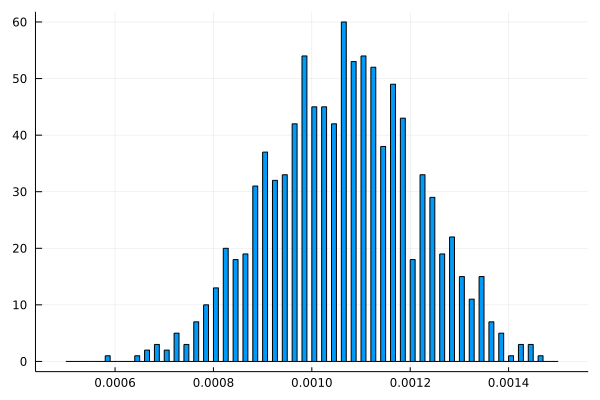

In [7]:
plot(birthday_distribution(1000),legend=false)

In [8]:
function birthday_problem(n)
    success = 0
    for t in 1:n
        months = @SVector [rand(1:12) for i in 1:20] # can use a static array (low number, up to 20-25)
        counts = [sum(months.==i) for i in 1:12]
        success += sum(counts.==2) == 4 && sum(counts.==3) == 4
    end
    success/n
end

birthday_problem (generic function with 1 method)

In [9]:
@time birthday_problem(10_000_000)

  2.741745 seconds (34.33 M allocations: 3.089 GiB, 13.64% gc time)


0.0010558

In [10]:
function birthday_problem(n)
    success = 0
    for t in 1:n
        months = @SVector [rand(1:12) for i in 1:20] # can use a static array (low number, up to 20-25)
        counts = @SVector [sum(months.==i) for i in 1:12]
        success += sum(counts.==2) == 4 && sum(counts.==3) == 4
    end
    success/n
end

birthday_problem (generic function with 1 method)

In [39]:
@time birthday_problem(10_000_000)

  1.114966 seconds


0.0010807

In [25]:
using FLoops

In [26]:
function birthday_problem_floop(t, ncores )

v = 0
  @floop ThreadedEx(basesize=t÷ncores) for _ in 1:t
       months =  @SVector [rand(1:12) for i in 1:20]
       counts =  @SVector [sum(months.==i) for i=1:12]
       success = sum(counts.==2) == 4  &&  sum(counts.==3)==4
       @reduce(v += success)           
  end
        
return v/t

end

birthday_problem_floop (generic function with 1 method)

In [35]:
@time birthday_problem_floop(10_000_000,1)

  1.195639 seconds (9 allocations: 288 bytes)


0.0010648